# Imports

In [55]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
import h5py
from planar_utils import plot_decision_boundary, load_planar_dataset, load_extra_datasets
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent


# Read cat vs non-cat Data

In [7]:
train_dataset = h5py.File('../dataset/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set imagenes
train_set_y = np.array(train_dataset["train_set_y"][:]).reshape(train_set_x_orig.shape[0], 1) # train set etiquetas

test_dataset = h5py.File('../dataset/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set imagenes
test_set_y = np.array(test_dataset["test_set_y"][:]).reshape(test_set_x_orig.shape[0], 1) # test set etiquetas

print('test images:', test_set_x_orig.shape)
print('train images:', train_set_x_orig.shape)
print('train tags:', train_set_y.shape)

test images: (50, 64, 64, 3)
train images: (209, 64, 64, 3)
train tags: (209, 1)


Visualize one image


y = [1]


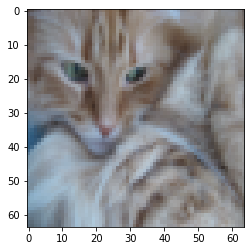

In [8]:
index = 2
plt.imshow(train_set_x_orig[index])
print (f"y = {train_set_y[index]}")

Convert the input to a one-dimensional array by grouping all the bits in an array sequentially. and normalize the pixels


In [9]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

train_set_x_flatten = train_set_x_flatten/255.0
test_set_x_flatten = test_set_x_flatten/255.0

#transpose the data
train_set_x_flatten = train_set_x_flatten.T
train_set_y = train_set_y.T
test_set_x_flatten = test_set_x_flatten.T
test_set_y = test_set_y.T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Salida Esperada**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

In [45]:
print(test_set_x_flatten)
#print(train_set_x_flatten)
#print(train_set_x_orig)

[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


# Neural Network


In [10]:
def sigmoid(z):
    """
    Return:
    s -- sigmoid(z)
    """
    
    
    s = 1./(1+np.exp(-z))
    
    return s

In [48]:
def layer_sizes(X, Y , H):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = H

    return (n_x,n_h, n_y)


In [12]:
(n_x, n_h, n_y ) = layer_sizes(train_set_x_flatten, train_set_y)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 12288
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


Initialize parameters

In [40]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)

    W1 = np.random.rand(n_h, n_x) #* 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.rand(n_y, n_h) #* 0.01
    b2 = np.zeros(shape=(n_y,1))

    #verify
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


Forward Propagation

In [14]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    m = X.shape[1]

    Z1 = W1@X + b1
    A1 = np.tanh(Z1)
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, m))


    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

Compute cost

In [15]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1]

    cost = -np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2)) /m

    cost = np.squeeze(cost)     

    assert(isinstance(cost, float))

    return cost  


Backward Propagation

In [16]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """

    m = Y.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = 1/m * dZ2@A1.T
    db2 = 1/m * np.sum(dZ2,axis=1, keepdims=True)
    dZ1 = W2.T@dZ2 * (1 - A1**2) 
    dW1 = 1/m * dZ1@X.T
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
                "db1": db1,
                "dW2": dW2,
                "db2": db2}

    return grads

Update parameters

In [5]:
def update_parameters(parameters, grads, learning_rate = 0.01):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Optimize

In [68]:
def model( X, Y, n_h, num_iterations = 10000,learning_rate = 0.01, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(3)
    (n_x, a ,n_y) = layer_sizes(X,Y, n_h)

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    print("Ok until init")
    for i in range (0,num_iterations):
        A2,cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i %1000 == 0:
            print("Cost after iteration %i : %f"%(i,cost))

    return parameters

Predict

In [73]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2,cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5 )*1

    return A2


Run


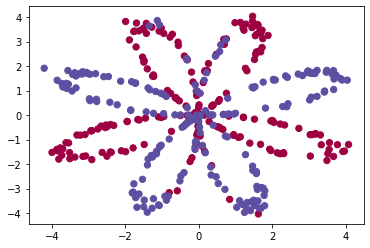

In [57]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [78]:
parameters = model(train_set_x_flatten, train_set_y, 1, 2001, 0.005, True )

# print( parameters)


Ok until init
Cost after iteration 0 : 0.722108
Cost after iteration 1000 : 0.644652


In [79]:
predictions = predict(parameters, test_set_x_flatten)
predictions_train = predict(parameters, train_set_x_flatten)
print ('Accuracy with train: %d' % float((np.dot(train_set_y,predictions_train.T) + np.dot(1-train_set_y,1-predictions_train.T))/float(train_set_y.size)*100) + '%')
print ('Accuracy with test: %d' % float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100) + '%')

Accuracy with train: 54%
Accuracy with test: 45%


Ok until init
Cost after iteration 0 : 0.901135
Cost after iteration 1000 : 0.287552
Cost after iteration 2000 : 0.273114
Cost after iteration 3000 : 0.237856
Cost after iteration 4000 : 0.227860
Cost after iteration 5000 : 0.223132
Cost after iteration 6000 : 0.220050
Cost after iteration 7000 : 0.217758
Cost after iteration 8000 : 0.215947
Cost after iteration 9000 : 0.218542
Cost after iteration 10000 : 0.217832


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

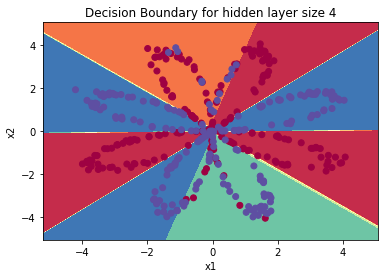

In [76]:
# Build a model with a n_h-dimensional hidden layer
parameters = model(X, Y, n_h = 4, num_iterations = 11000,learning_rate= 1.2, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [77]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 85%
